In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import wave
import scipy.io.wavfile as wavfile

In [3]:
import simpleaudio as sa

In [4]:
filename='ImperialMarch47.wav'
samplerate, sound = wavfile.read(filename)

/var/folders/tz/s_tt2bnd0pzbthsf96nxldx00000gn/T/ipykernel_98743/161377286.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, sound = wavfile.read(filename)


In [5]:
wave_read = wave.open(filename, 'rb')
audio_data = wave_read.readframes(wave_read.getnframes())
num_channels = wave_read.getnchannels()
bytes_per_sample = wave_read.getsampwidth()
sample_rate = wave_read.getframerate()
print(num_channels,bytes_per_sample,sample_rate)

1 2 22050


In [6]:
N=sound.shape[0]
time=N/samplerate
print(time,N,samplerate)

46.52662131519274 1025912 22050


In [7]:
t=np.linspace(0,N-1,N)/samplerate

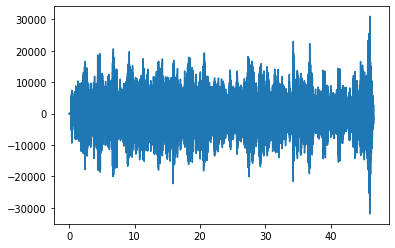

In [8]:
plt.figure()
plt.plot(t,sound)
plt.show()

In [9]:
Fsound=np.fft.fft(sound)
freq = np.fft.fftfreq(N, d=1.0/samplerate)

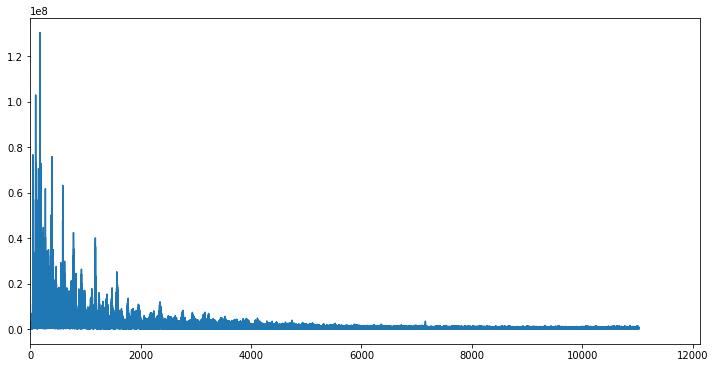

In [10]:
plt.figure(figsize=(12,6))
plt.plot(freq,np.abs(Fsound))
plt.xlim(0)
plt.show()

In [11]:
Fbase=np.copy(Fsound)
filter_freq=(np.abs(freq)<=200) * (np.abs(freq)>=freq[1])
Fbase[filter_freq]=Fbase[filter_freq]*0.2

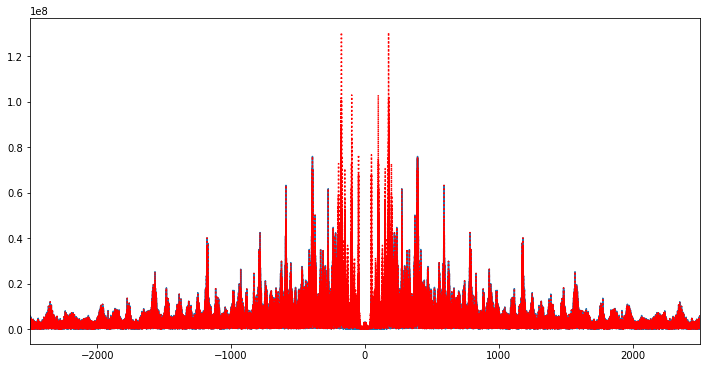

In [12]:
plt.figure(figsize=(12,6))
plt.plot(freq,np.abs(Fbase))
plt.plot(freq,np.abs(Fsound),'r:')
plt.xlim(-2500,2500)
plt.show()

In [13]:
resound=np.real(np.fft.ifft(Fsound))
resound_base=np.real(np.fft.ifft(Fbase))

In [14]:
Rmin=np.amin(resound)
Rmax=np.amax(resound)
Bmin=np.amin(resound_base)
Bmax=np.amax(resound_base)
resound_baseN=((resound_base-Bmin)/(Bmax-Bmin))*(Rmax-Rmin)+Rmin
print(Bmax,Bmin)
print(Rmax,Rmin)
print(np.amax(resound_baseN),np.amin(resound_baseN))

27362.808772789525 -21939.466352726995
31030.999999999985 -31960.999999999985
31030.999999999985 -31960.999999999985


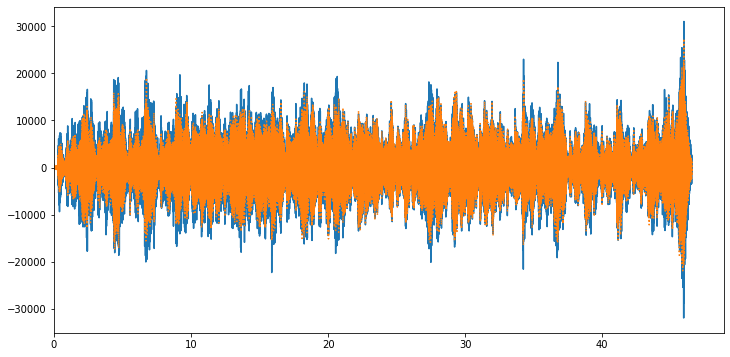

In [15]:
plt.figure(figsize=(12,6))
plt.plot(t,resound)
plt.plot(t,resound_base,':')
plt.xlim(0)
plt.show()

In [55]:
filename='ref.wav'
wavfile.write(filename,samplerate,np.int16(resound))

In [56]:
filename='base.wav'
wavfile.write(filename,samplerate,np.int16(resound_baseN))

In [57]:
play_obj = sa.play_buffer(np.int16(resound_baseN[0:5*samplerate]), 1, 2, samplerate)
play_obj.wait_done()
